# Black Friday Dataset (E-Commerce)
# EDA And Feature Engineering

# Black Friday Sales Prediction
This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

#### Problem: Predict purchase amount.

# Data Overview
Dataset has 537577 rows (transactions) and 12 columns (features) as described below:

- User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.
- Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.
- Gender: indicates the gender of the person making the transaction.
- Age: indicates the age group of the person making the transaction.
- Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
- City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
- Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
- Marital_Status: is 0 if the user is not married and 1 otherwise.
- Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.
- Purchase: Purchase amount.

### Cleaning and preparing the data for model training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

## Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.shape 

(550068, 12)

In [4]:
# import the test data
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df_test.shape 

(233599, 11)

In [6]:
df=pd.merge(df_train,df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [7]:
# Not Merging both train and test data in col
# Addind test set below
df=df_train.append(df_test)
df.head()

C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_22900\2600855902.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [9]:
df.shape 

(783667, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [13]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

# HAndling categorical feature Gender

In [15]:
pd.get_dummies(df["Gender"])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [16]:
# df['Gender']=pd.get_dummies(df["Gender"],drop_first=1)

In [17]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


save it & add to df set

In [18]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Handle categorical feature Age

In [19]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
# no.of col increase 
# not good pratice
pd.get_dummies(df['Age'],drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
233594,0,1,0,0,0,0
233595,0,1,0,0,0,0
233596,0,1,0,0,0,0
233597,0,0,0,1,0,0


In [21]:
# Map fn
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [22]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


# This is called Target Ordinal Encoding

# second technqiue -- not good pratice
### Using label_encoder

In [23]:
from sklearn import preprocessing

In [24]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
label_encoder

LabelEncoder()

In [25]:
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
df['Age']

0         0
1         0
2         0
3         0
4         6
         ..
233594    2
233595    2
233596    2
233597    4
233598    4
Name: Age, Length: 783667, dtype: int64

In [26]:
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [27]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [28]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,1,6,16,C,4+,0,8,NaN,NaN,7969.0


# Fixing categorical City_categort

In [29]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [30]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [31]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [32]:
#drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [33]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


# Missing Values

In [34]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

1. replacing missing values in Product_Category_2 & Product_Categ
2. Purchase - target variable missing values in test set

In [35]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [36]:
# Focus on replacing missing values

df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

## Discrete Feature --- replace missing values with MODE

In [37]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [38]:
# mode

df['Product_Category_2'].mode()[0]

8.0

In [39]:
# Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [40]:
df['Product_Category_2'].isnull().sum()

0

In [41]:
# Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [42]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [43]:
df['Product_Category_3'].mode()[0]

16.0

In [44]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [45]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,6,16,4+,0,8,8.0,16.0,7969.0,0,1


In [46]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [47]:
df.shape

(783667, 11)

In [48]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [49]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\Muthu Ishwarya\AppData\Local\Temp\ipykernel_22900\2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [50]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 61.3+ MB


# Convert object into integers

In [52]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), uint8(2)
memory usage: 58.3 MB


## uint8  is an 8-bit unsigned int(rangr: 0 thro 255 decimal)

In [54]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 62.8 MB


# Visualisation 

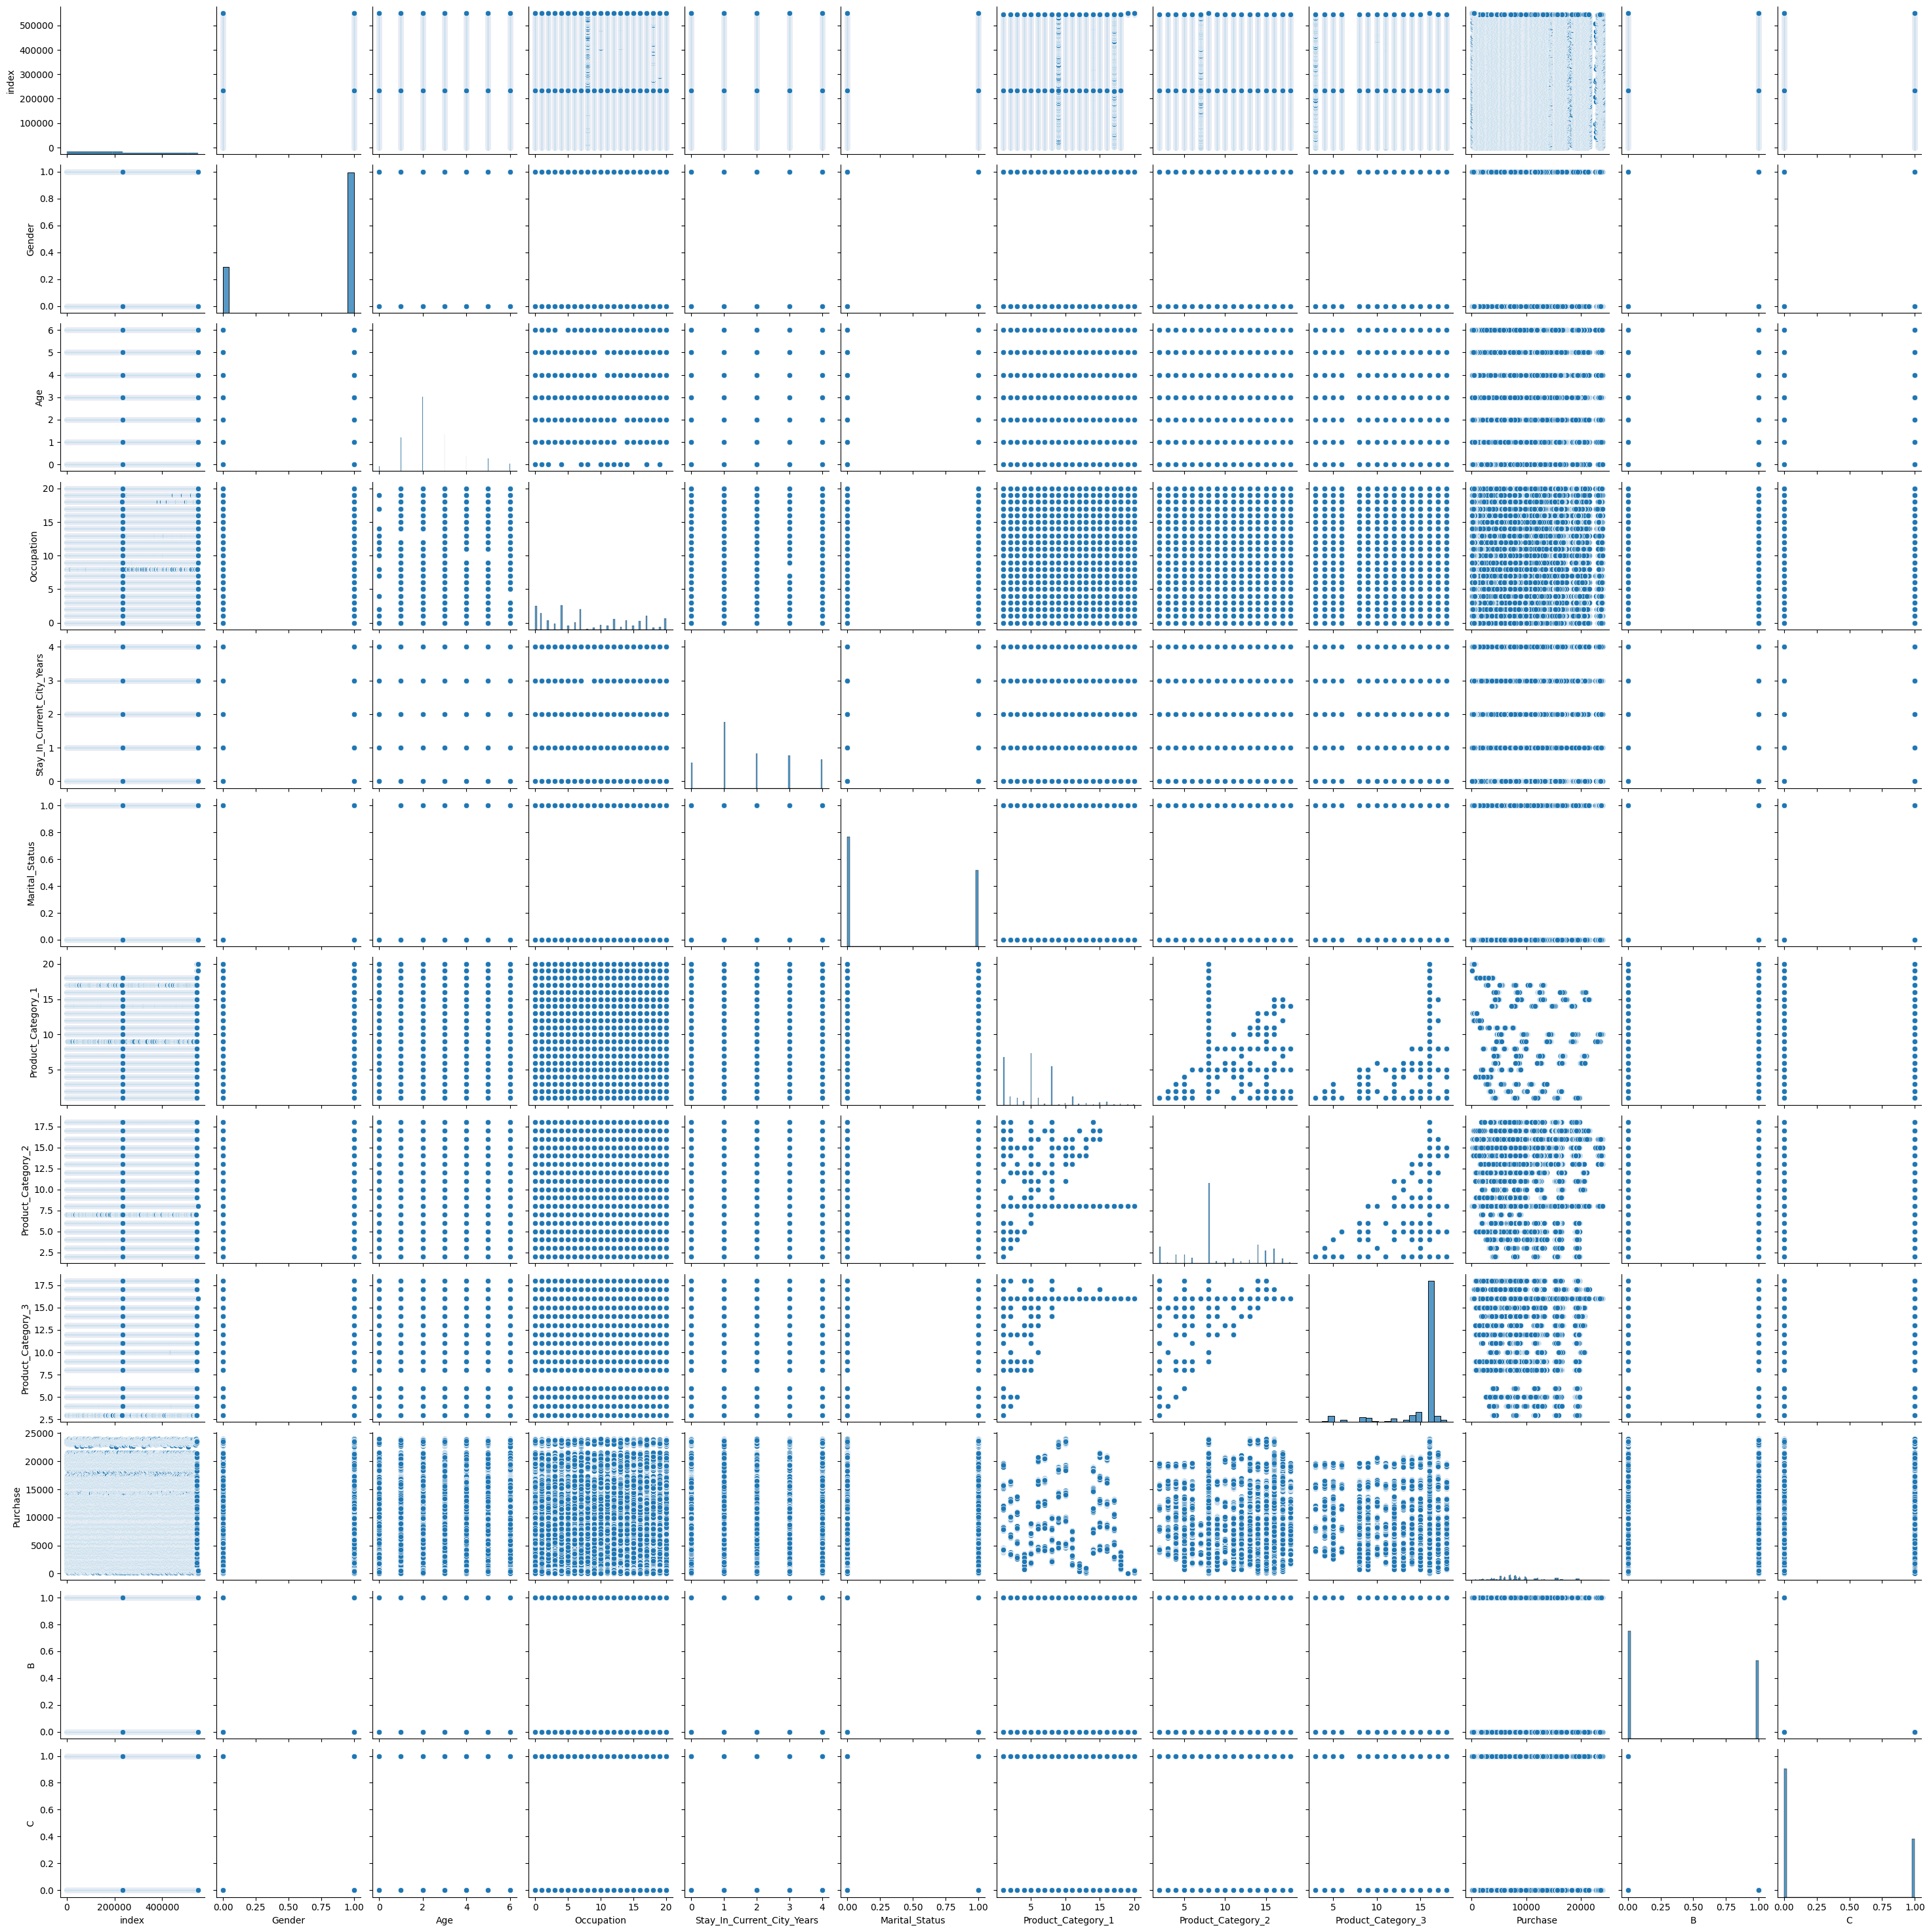

In [56]:
df1 = df.reset_index()
sns.pairplot(df1)

<AxesSubplot: xlabel='Age', ylabel='Purchase'>

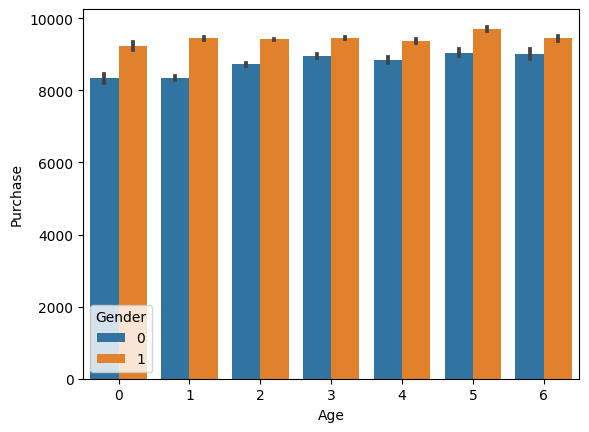

In [57]:
# Age vs Purchased

sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

## Observation:
Purchasing of men is high then women

<AxesSubplot: xlabel='Occupation', ylabel='Purchase'>

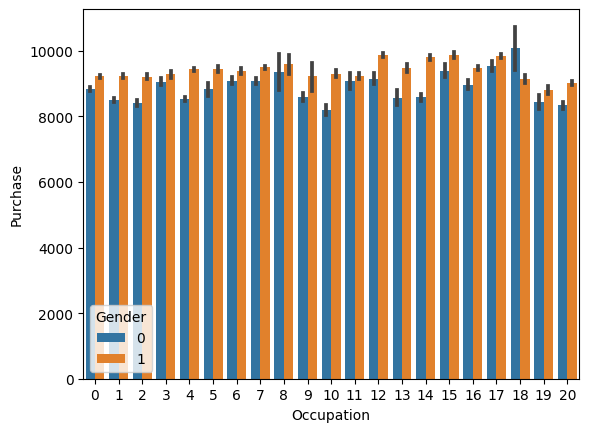

In [58]:
# Purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

### Product_Category_1 vs Product_Category_2

<AxesSubplot: xlabel='Product_Category_1', ylabel='Purchase'>

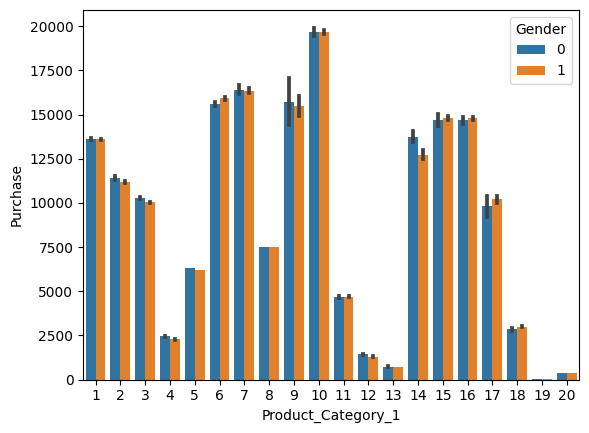

In [59]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<AxesSubplot: xlabel='Product_Category_2', ylabel='Purchase'>

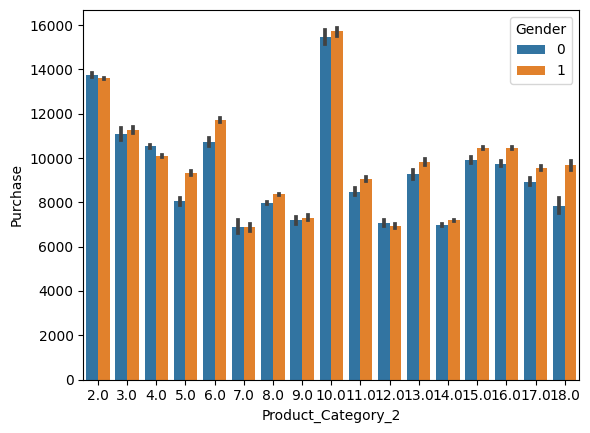

In [60]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<AxesSubplot: xlabel='Product_Category_3', ylabel='Purchase'>

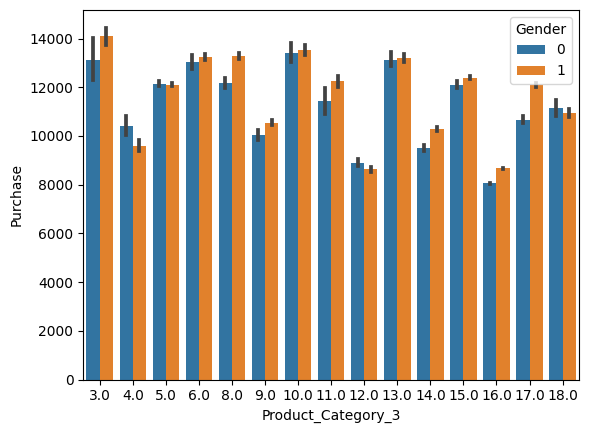

In [61]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

# Feature Scaling

In [62]:
df_test=df[df['Purchase'].isnull()]

In [63]:
df_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,0,3,1,4,1,5,14.0,16.0,NaN,1,0
3,0,3,1,4,1,4,9.0,16.0,NaN,1,0
4,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [64]:
df_train=df[~df['Purchase'].isnull()]

In [65]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [66]:
X=df_train.drop('Purchase',axis=1)

In [67]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,0,10,2,0,3,8.0,16.0,0,0
1,0,0,10,2,0,1,6.0,14.0,0,0
2,0,0,10,2,0,12,8.0,16.0,0,0
3,0,0,10,2,0,12,14.0,16.0,0,0
4,1,6,16,4,0,8,8.0,16.0,0,1


In [68]:
X.shape

(550068, 10)

In [69]:
y=df_train["Purchase"]

In [70]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [71]:
y.shape

(550068,)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(368545, 10)
(181523, 10)
(368545,)
(181523,)


In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [75]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [76]:
X_train

array([[ 0.57141282, -1.10505734,  0.90867822, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 0.57141282,  1.84716932, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       [ 0.57141282,  0.37105599,  1.36872445, ..., -1.09182956,
        -0.85056064,  1.48627336],
       ...,
       [-1.75004823, -1.10505734, -1.08485545, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064, -0.67282374]])

In [77]:
X_test

array([[ 0.57141282,  1.84716932,  1.67542193, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [-1.75004823,  0.37105599,  0.44863199, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823,  0.37105599, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       ...,
       [ 0.57141282, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [ 0.57141282,  0.37105599, -0.16476299, ...,  0.00373169,
        -0.85056064,  1.48627336],
       [ 0.57141282, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374]])

# LinearRegression

In [78]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.fit(X_train, y_train))

LinearRegression()


In [80]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [82]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 9260.52247622407
                            Coefficient
Gender                       219.403409
Age                          161.483993
Occupation                    40.751979
Stay_In_Current_City_Years    13.003283
Marital_Status               -29.401714
Product_Category_1         -1595.039990
Product_Category_2            -6.248300
Product_Category_3          -421.648987
B                             76.371386
C                            311.827410


In [83]:
predictions = lm.predict(X_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [11827.531432   10472.23195058  7361.92482116 ... 10419.50288826
 11647.9911962  10649.86876652]


In [84]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 3577.2377941856957
MSE: 21939163.32153542


In [86]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    linear_reg_preds = linear_reg.predict(X_test)

    ridge_reg = Ridge()
    ridge_reg.fit(X_train, y_train)
    ridge_reg_preds = ridge_reg.predict(X_test)

    lasso_reg = Lasso()
    lasso_reg.fit(X_train, y_train)
    lasso_reg_preds = lasso_reg.predict(X_test)
    
    decision_tree = DecisionTreeRegressor()
    decision_tree.fit(X_train, y_train)
    decision_tree_preds = decision_tree.predict(X_test)

    xgboost = XGBRegressor()
    xgboost.fit(X_train, y_train)
    xgboost_preds = xgboost.predict(X_test)
    
    print("Linear Regression:")
    print("Mean Squared Error:", mean_squared_error(y_test, linear_reg_preds))
    print("R-squared:", r2_score(y_test, linear_reg_preds))
    
    print("\nRidge Regression:")
    print("Mean Squared Error:", mean_squared_error(y_test, ridge_reg_preds))
    print("R-squared:", r2_score(y_test, ridge_reg_preds))
    
    print("\nLasso Regression:")
    print("Mean Squared Error:", mean_squared_error(y_test, lasso_reg_preds))
    print("R-squared:", r2_score(y_test, lasso_reg_preds))
    
    print("\nDecision Tree:")
    print("Mean Squared Error:", mean_squared_error(y_test, decision_tree_preds))
    print("R-squared:", r2_score(y_test, decision_tree_preds))
    
    print("\nXGBoost:")
    print("Mean Squared Error:", mean_squared_error(y_test, xgboost_preds))
    print("R-squared:", r2_score(y_test, xgboost_preds))

Linear Regression:
Mean Squared Error: 21939163.32153542
R-squared: 0.12948768560712398

Ridge Regression:
Mean Squared Error: 21939163.069972765
R-squared: 0.12948769558874373

Lasso Regression:
Mean Squared Error: 21939168.89936886
R-squared: 0.12948746428725755

Decision Tree:
Mean Squared Error: 11113012.33185839
R-squared: 0.5590527340034597

XGBoost:
Mean Squared Error: 8393446.552897219
R-squared: 0.6669609283904037


## XGBoost giving better prediction overall